### Loading libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import sympy as sm
import math

###  Implement Quadratic Equation and Derivative for Function 1: 1*(x-2)^4+6*(y-9)^2

In [2]:
class Function1 :
    
    def get_quadratic_equation_value(self, x, y) : 
        value = ((x - 2) ** 4) + (6 * ((y - 9) ** 2))
        return value
    
    def get_quadratic_equation_derivative_value(self, x, y) : 
        derivative_x_value = 4 * ((x - 2) ** 3)
        derivative_y_value = (12 * y) - 108
        return derivative_x_value, derivative_y_value
    

In [3]:
function1 = Function1()
test_function_value = function1.get_quadratic_equation_value(3, 3)
print(f'Function 1 value for x = 3 and y = 3 is: {test_function_value}')

test_function_derivative_value_x, test_function_derivative_value_y = function1.get_quadratic_equation_derivative_value(3, 3)
print(f'Function 1 derivative for x = 3 is: {test_function_derivative_value_x} and for y = 3 is: {test_function_derivative_value_y}')

Function 1 value for x = 3 and y = 3 is: 217
Function 1 derivative for x = 3 is: 4 and for y = 3 is: -72


### Implement Quadratic Equation and Derivative for Function 2: Max(x-2,0)+6*|y-9|

In [4]:
class Function2 :
    
    def get_quadratic_equation_value(self, x, y) : 
        value = (max((x - 2), 0)) + (6 * np.abs(y - 9))
        return value
    
    def get_quadratic_equation_derivative_value(self, x, y) : 
        derivative_x_value = np.heaviside((x - 2), 1)
        derivative_y_value = 6 * np.sign(y - 9)
        return derivative_x_value, derivative_y_value
    

In [5]:
function2 = Function2()
test_function_value = function2.get_quadratic_equation_value(-1, 3)
print(f'Function 2 value for x = 3 and y = 3 is: {test_function_value}')

test_function_derivative_value_x, test_function_derivative_value_y = function2.get_quadratic_equation_derivative_value(3, 3)
print(f'Function 2 derivative for x = 3 is: {test_function_derivative_value_x} and for y = 3 is: {test_function_derivative_value_y}')

Function 2 value for x = 3 and y = 3 is: 36
Function 2 derivative for x = 3 is: 1.0 and for y = 3 is: -6


### Question a(i): Polyak step size Gradient Descent

In [6]:
def execute_polyak_gradient_descent(function_object, starting_point_x = 1, starting_point_y = 1, num_iterations = 50) : 
    
    x_point = starting_point_x
    y_point = starting_point_y
    x_values = np.array([starting_point_x])
    y_values = np.array([starting_point_y])
    function_values = np.array([function_object.get_quadratic_equation_value(starting_point_x, starting_point_y)])
    epsilon = 1e-8
    
    for _ in range(num_iterations) : 
        
        numerator = function_object.get_quadratic_equation_value(x_point, y_point)
        derivative_x_value, derivative_y_value = function_object.get_quadratic_equation_derivative_value(x_point, y_point)
        denominator = ((derivative_x_value + derivative_y_value) ** 2) + epsilon
        step = numerator / denominator
        x_point = x_point - step * derivative_x_value
        y_point = y_point - step * derivative_y_value
        x_values = np.append(x_values, [x_point], axis = 0)
        y_values = np.append(y_values, [y_point], axis = 0)
        function_values = np.append(function_values, [function_object.get_quadratic_equation_value(x_point, y_point)])
        
    return x_values, y_values, function_values

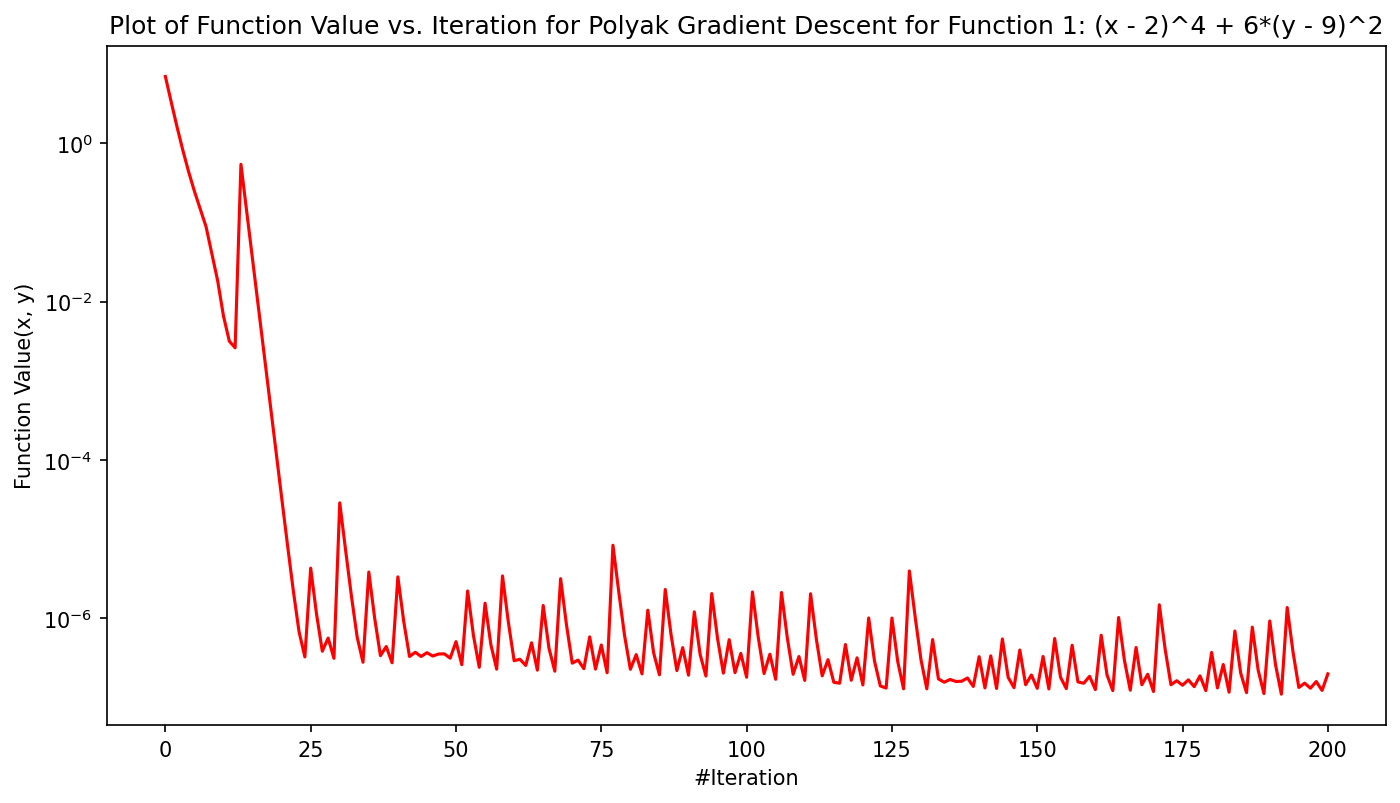

In [7]:
function1 = Function1()
x_values, y_values, function_values = execute_polyak_gradient_descent(function1, starting_point_x = 1, starting_point_y = 8, num_iterations = 200)

plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(function_values, color = "Red")
plot.xlabel('#Iteration')
plot.ylabel('Function Value(x, y)')
plot.title('Plot of Function Value vs. Iteration for Polyak Gradient Descent for Function 1: (x - 2)^4 + 6*(y - 9)^2') 
plot.yscale("log")
plot.show()

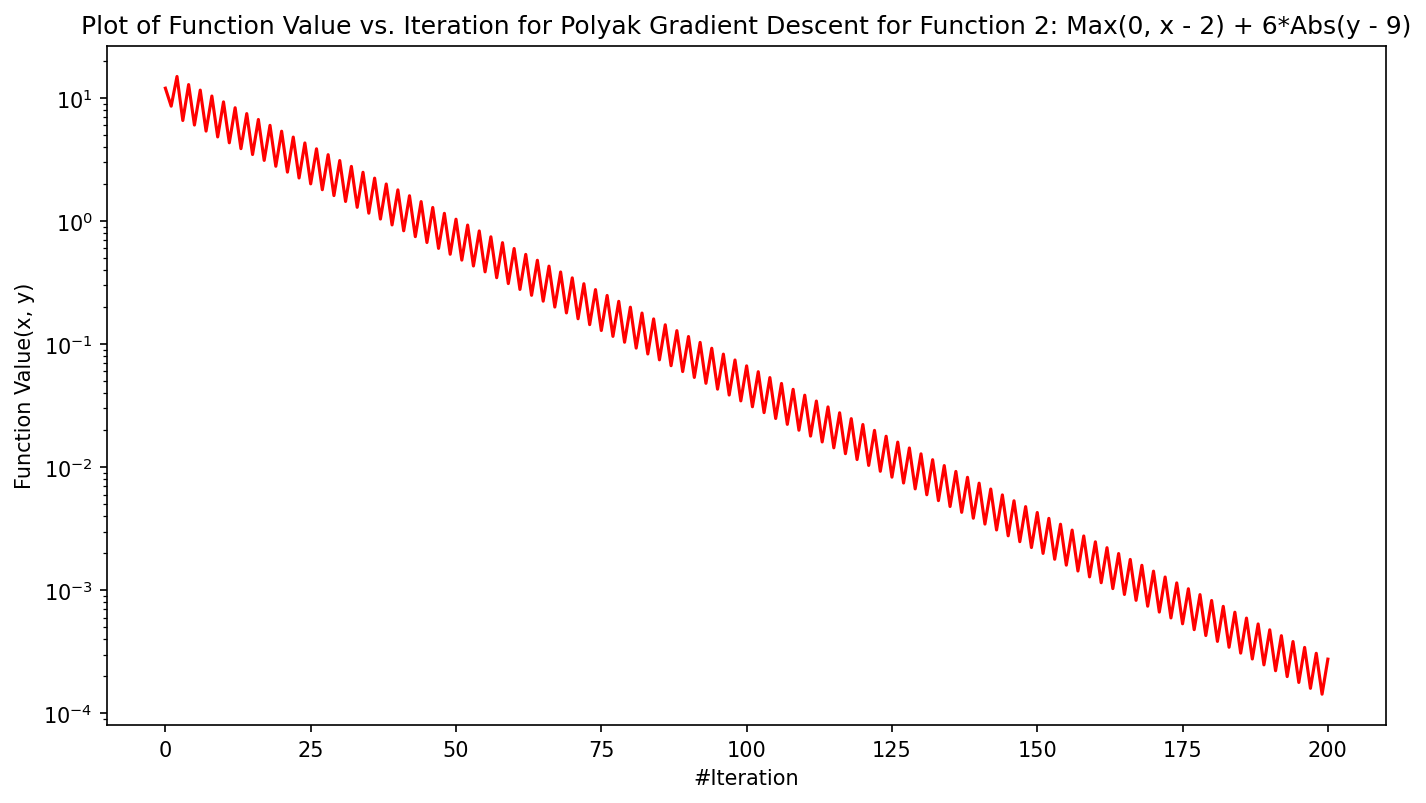

In [8]:
function2 = Function2()
x_values, y_values, function_values = execute_polyak_gradient_descent(function2, starting_point_x = 8, starting_point_y = 10, num_iterations = 200)

plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(function_values, color = "Red")
plot.xlabel('#Iteration')
plot.ylabel('Function Value(x, y)')
plot.title('Plot of Function Value vs. Iteration for Polyak Gradient Descent for Function 2: Max(0, x - 2) + 6*Abs(y - 9)') 
plot.yscale("log")
plot.show()

### Question a(ii): RMSProp Gradient Descent

In [9]:
def execute_rmsprop_gradient_descent(function_object, starting_point_x = 1, starting_point_y = 1, alpha = 1, beta = 1, num_iterations = 50) : 
    
    x_point = starting_point_x
    y_point = starting_point_y
    x_values = np.array([starting_point_x])
    y_values = np.array([starting_point_y])
    function_values = np.array([function_object.get_quadratic_equation_value(starting_point_x, starting_point_y)])
    epsilon = 1e-8
    
    x_alpha = alpha
    y_alpha = alpha
    x_sum = 0
    y_sum = 0
    
    for _ in range(num_iterations) : 
        
        derivative_x_value, derivative_y_value = function_object.get_quadratic_equation_derivative_value(x_point, y_point)
        x_sum = (x_sum * beta) + ((1 - beta) * ((derivative_x_value) ** 2))
        y_sum = (y_sum * beta) + ((1 - beta) * ((derivative_y_value) ** 2))
        
        x_alpha = alpha / (math.sqrt(x_sum) + epsilon)
        y_alpha = alpha / (math.sqrt(y_sum) + epsilon)
        
        x_point = x_point - (x_alpha * derivative_x_value)
        y_point = y_point - (y_alpha * derivative_y_value)
        
        x_values = np.append(x_values, [x_point], axis = 0)
        y_values = np.append(y_values, [y_point], axis = 0)
        function_values = np.append(function_values, [function_object.get_quadratic_equation_value(x_point, y_point)])
        
    return x_values, y_values, function_values

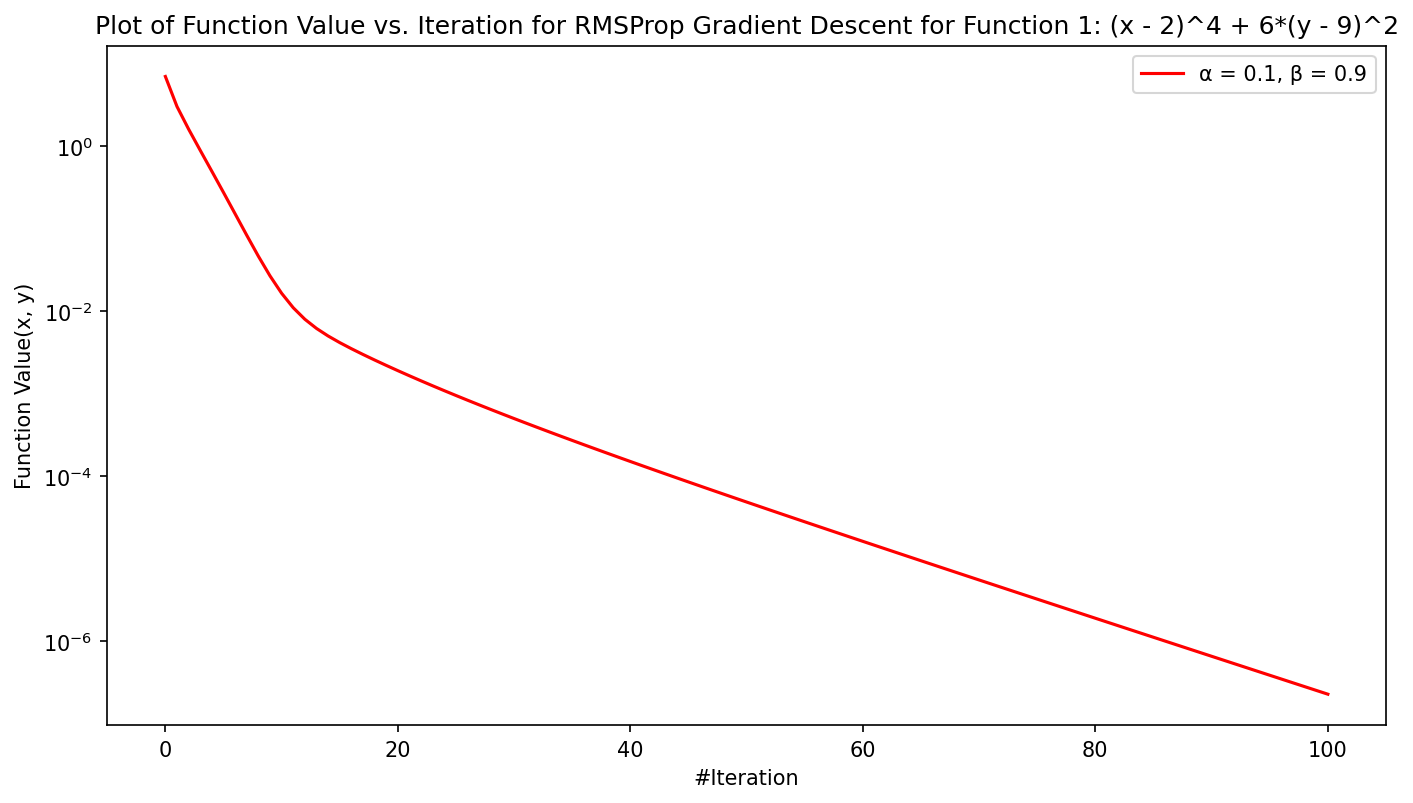

In [10]:
function1 = Function1()
x_values, y_values, function_values = execute_rmsprop_gradient_descent(function1, starting_point_x = 1, starting_point_y = 10, alpha = 0.1, beta = 0.9, num_iterations = 100)
plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(function_values, color = "Red", label = 'α = 0.1, β = 0.9')
plot.xlabel('#Iteration')
plot.ylabel('Function Value(x, y)')
plot.title('Plot of Function Value vs. Iteration for RMSProp Gradient Descent for Function 1: (x - 2)^4 + 6*(y - 9)^2') 
plot.yscale("log")
plot.legend()
plot.show()

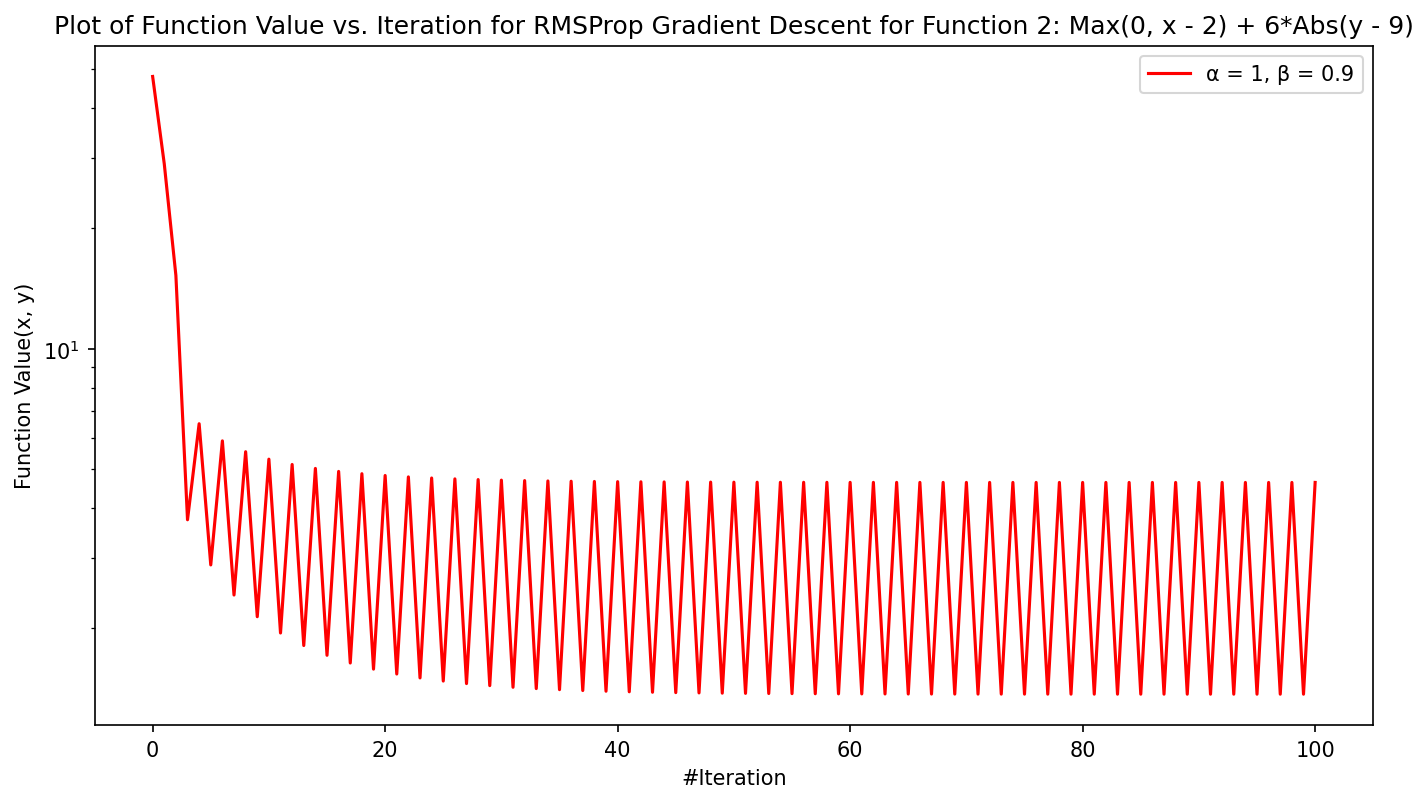

In [11]:
function2 = Function2()
x_values, y_values, function_values = execute_rmsprop_gradient_descent(function2, starting_point_x = 1, starting_point_y = 1, alpha = 1, beta = 0.9, num_iterations = 100)
plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(function_values, color = "Red", label = 'α = 1, β = 0.9')
plot.xlabel('#Iteration')
plot.ylabel('Function Value(x, y)')
plot.title('Plot of Function Value vs. Iteration for RMSProp Gradient Descent for Function 2: Max(0, x - 2) + 6*Abs(y - 9)') 
plot.yscale("log")
plot.legend()
plot.show()

### Question a(iii): Heavy Ball Gradient Descent

In [12]:
def execute_heavyball_gradient_descent(function_object, starting_point_x = 1, starting_point_y = 1, alpha = 1, beta = 1, num_iterations = 50) : 
    
    x_point = starting_point_x
    y_point = starting_point_y
    x_values = np.array([starting_point_x])
    y_values = np.array([starting_point_y])
    function_values = np.array([function_object.get_quadratic_equation_value(starting_point_x, starting_point_y)])
    epsilon = 1e-8
    
    x_z = 0
    y_z = 0
    
    for _ in range(num_iterations) : 
        
        derivative_x_value, derivative_y_value = function_object.get_quadratic_equation_derivative_value(x_point, y_point)
        x_z = (x_z * beta) + (alpha * derivative_x_value)
        y_z = (y_z * beta) + (alpha * derivative_y_value)
        
        x_point = x_point - x_z
        y_point = y_point - y_z
        
        x_values = np.append(x_values, [x_point], axis = 0)
        y_values = np.append(y_values, [y_point], axis = 0)
        function_values = np.append(function_values, [function_object.get_quadratic_equation_value(x_point, y_point)])
        
    return x_values, y_values, function_values

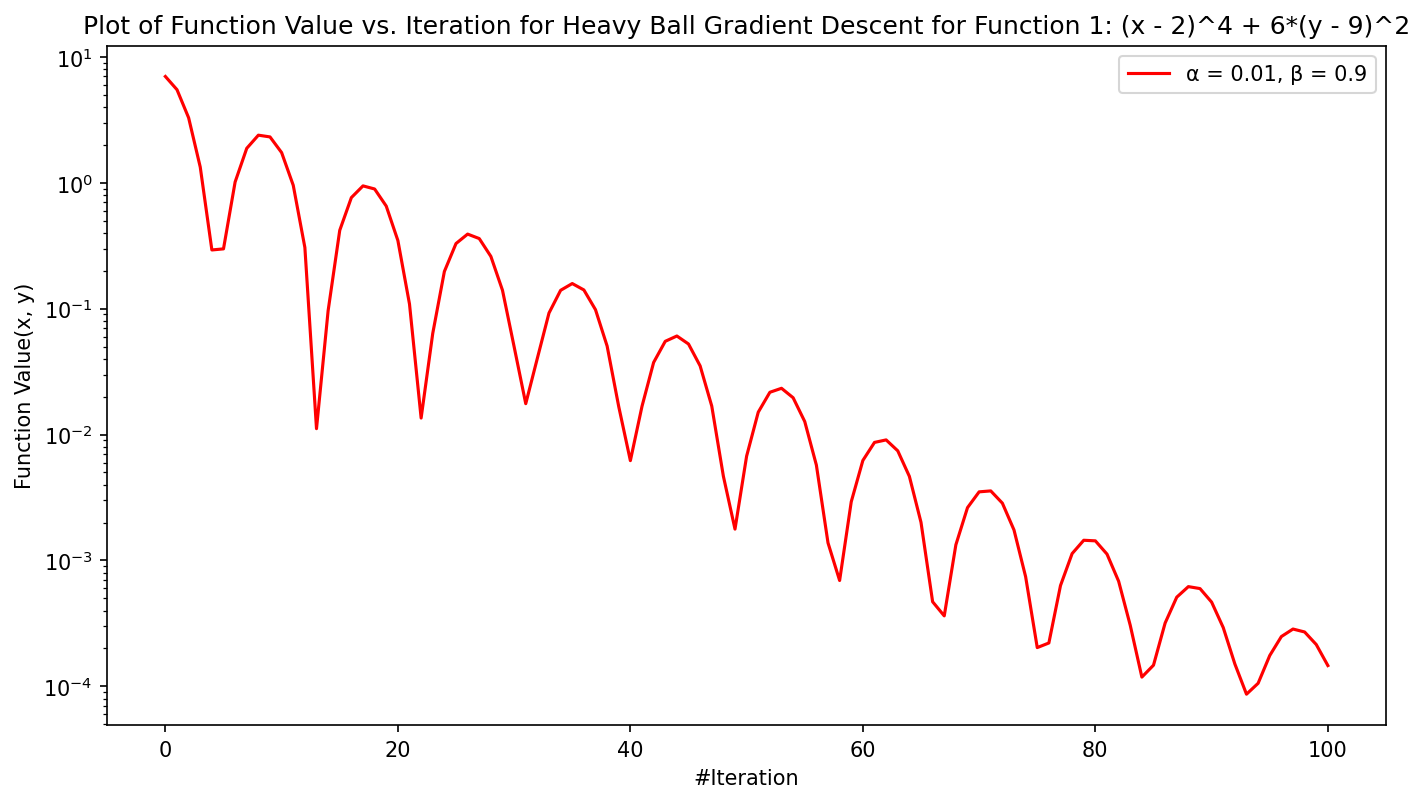

In [13]:
function1 = Function1()
x_values, y_values, function_values = execute_heavyball_gradient_descent(function1, starting_point_x = 1, starting_point_y = 10, alpha = 0.01, beta = 0.9, num_iterations = 100)
plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(function_values, color = "Red", label = 'α = 0.01, β = 0.9')
plot.xlabel('#Iteration')
plot.ylabel('Function Value(x, y)')
plot.title('Plot of Function Value vs. Iteration for Heavy Ball Gradient Descent for Function 1: (x - 2)^4 + 6*(y - 9)^2') 
plot.yscale("log")
plot.legend()
plot.show()

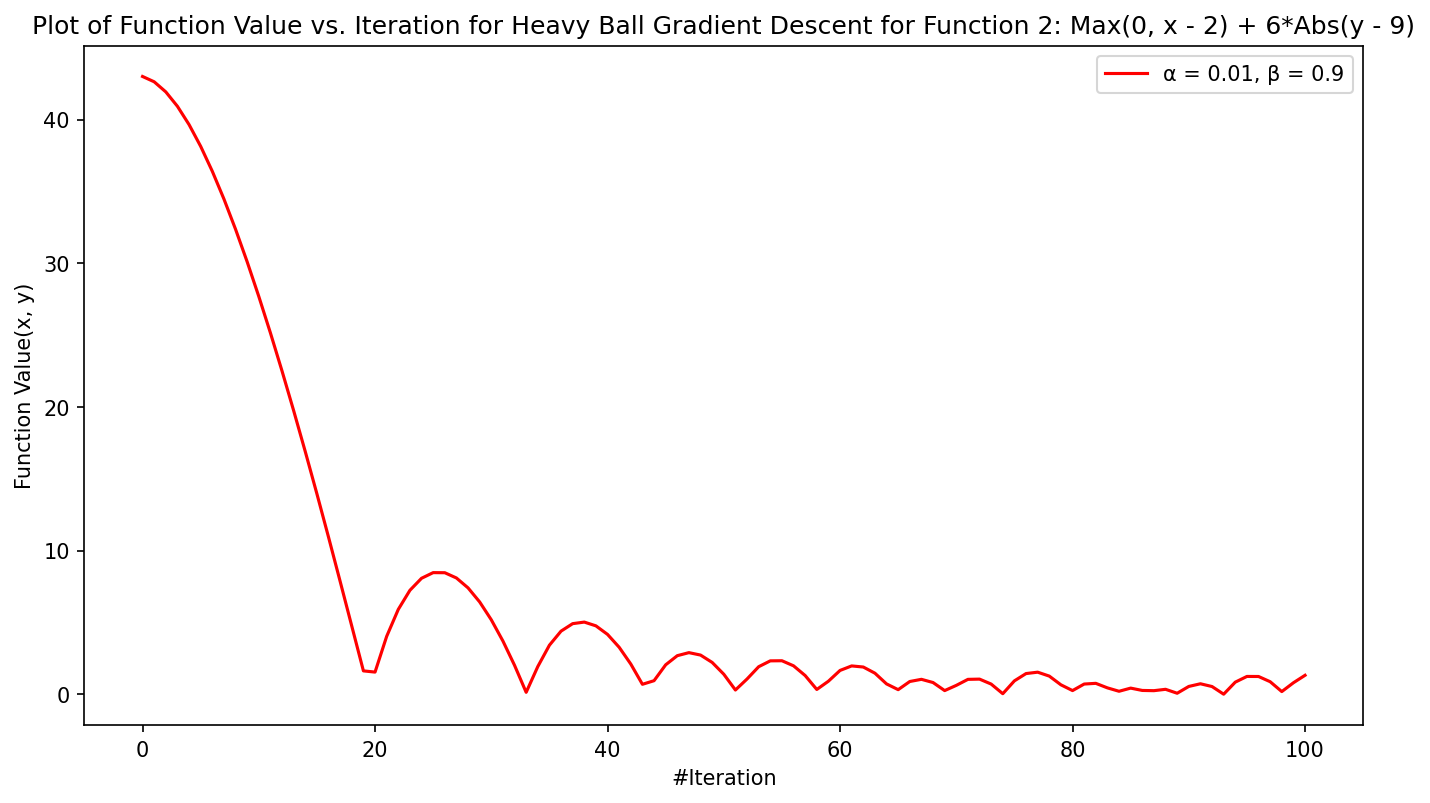

In [14]:
function2 = Function2()
x_values, y_values, function_values = execute_heavyball_gradient_descent(function2, starting_point_x = 3, starting_point_y = 2, alpha = 0.01, beta = 0.9, num_iterations = 100)
plot.figure(figsize=(11, 6), dpi=150)
plot.plot(function_values, color = "Red", label = 'α = 0.01, β = 0.9')
plot.xlabel('#Iteration')
plot.ylabel('Function Value(x, y)')
plot.title('Plot of Function Value vs. Iteration for Heavy Ball Gradient Descent for Function 2: Max(0, x - 2) + 6*Abs(y - 9)') 
plot.legend()
plot.show()

### Question a(iv): Adam Gradient Descent

In [15]:
def execute_adam_gradient_descent(function_object, starting_point_x = 1, starting_point_y = 1, alpha = 1, beta_1 = 1, beta_2 = 1, num_iterations = 50) : 
    
    x_point = starting_point_x
    y_point = starting_point_y
    x_values = np.array([starting_point_x])
    y_values = np.array([starting_point_y])
    function_values = np.array([function_object.get_quadratic_equation_value(starting_point_x, starting_point_y)])
    epsilon = 1e-8
    
    x_v = 0
    x_m = 0
    
    y_v = 0
    y_m = 0
    
    for i in range(num_iterations) : 
        
        derivative_x_value, derivative_y_value = function_object.get_quadratic_equation_derivative_value(x_point, y_point)
        
        x_m = (x_m * beta_1) + ((1 - beta_1) * derivative_x_value)
        y_m = (y_m * beta_1) + ((1 - beta_1) * derivative_y_value)
        
        x_v = (x_v * beta_2) + ((1 - beta_2) * ((derivative_x_value) ** 2))
        y_v = (y_v * beta_2) + ((1 - beta_2) * ((derivative_y_value) ** 2))
        
        x_m_hat = x_m / (1 - beta_1 ** i + 1)
        y_m_hat = y_m / (1 - beta_1 ** i + 1)
        
        x_v_hat = x_v / (1 - beta_2 ** i + 1)               
        y_v_hat = y_v / (1 - beta_2 ** i + 1)
        
        x_alpha = x_m_hat / (math.sqrt(x_v_hat) + epsilon)
        y_alpha = y_m_hat / (math.sqrt(y_v_hat) + epsilon)
        
        x_point = x_point - (x_alpha * alpha)
        y_point = y_point - (y_alpha * alpha)

        x_values = np.append(x_values, [x_point], axis = 0)
        y_values = np.append(y_values, [y_point], axis = 0)
        function_values = np.append(function_values, [function_object.get_quadratic_equation_value(x_point, y_point)])
        
    return x_values, y_values, function_values

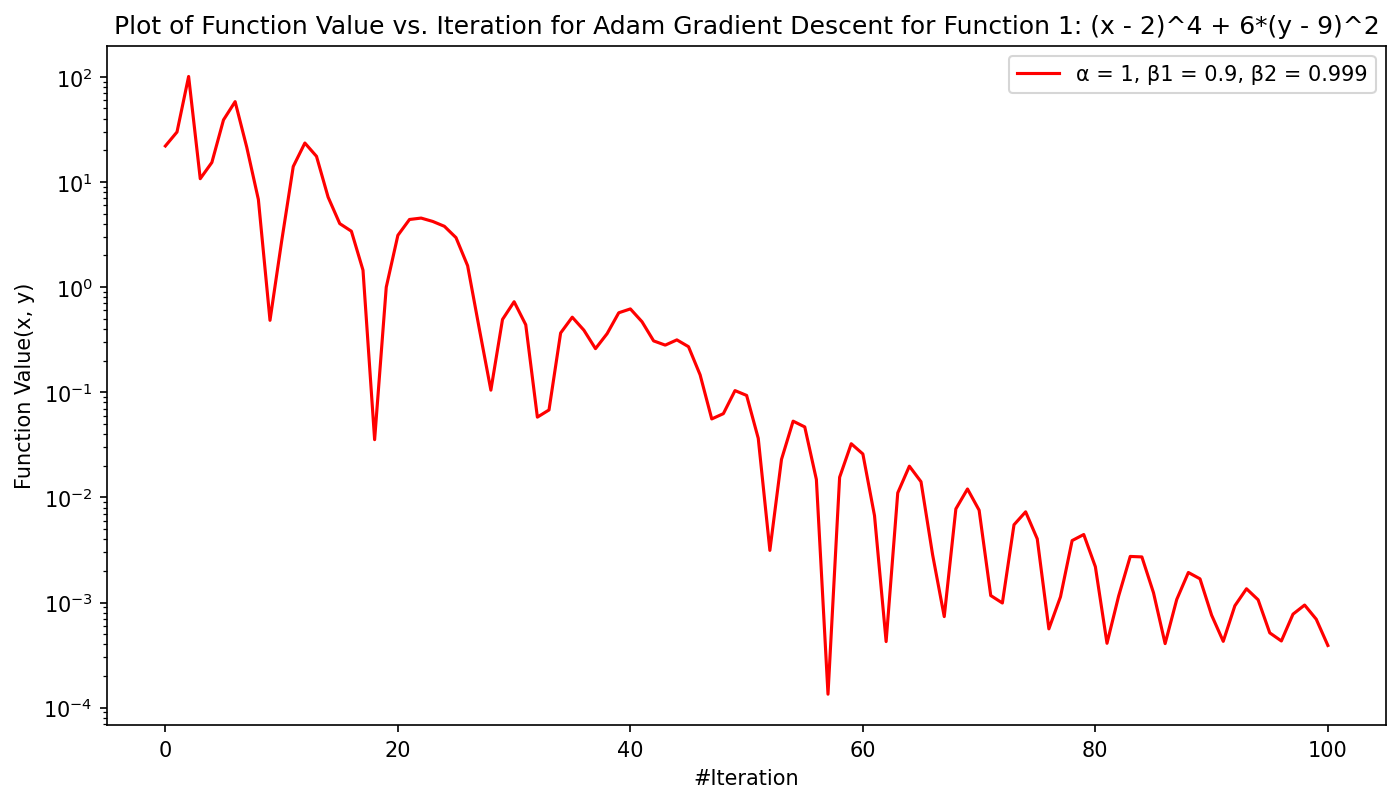

In [16]:
function1 = Function1()
x_values, y_values, function_values = execute_adam_gradient_descent(function1, starting_point_x = 4, starting_point_y = 10, alpha = 1, beta_1 = 0.9, beta_2 = 0.999, num_iterations = 100)
plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(function_values, color = "Red", label = 'α = 1, β1 = 0.9, β2 = 0.999')
plot.xlabel('#Iteration')
plot.ylabel('Function Value(x, y)')
plot.title('Plot of Function Value vs. Iteration for Adam Gradient Descent for Function 1: (x - 2)^4 + 6*(y - 9)^2') 
plot.yscale("log")
plot.legend()
plot.show()

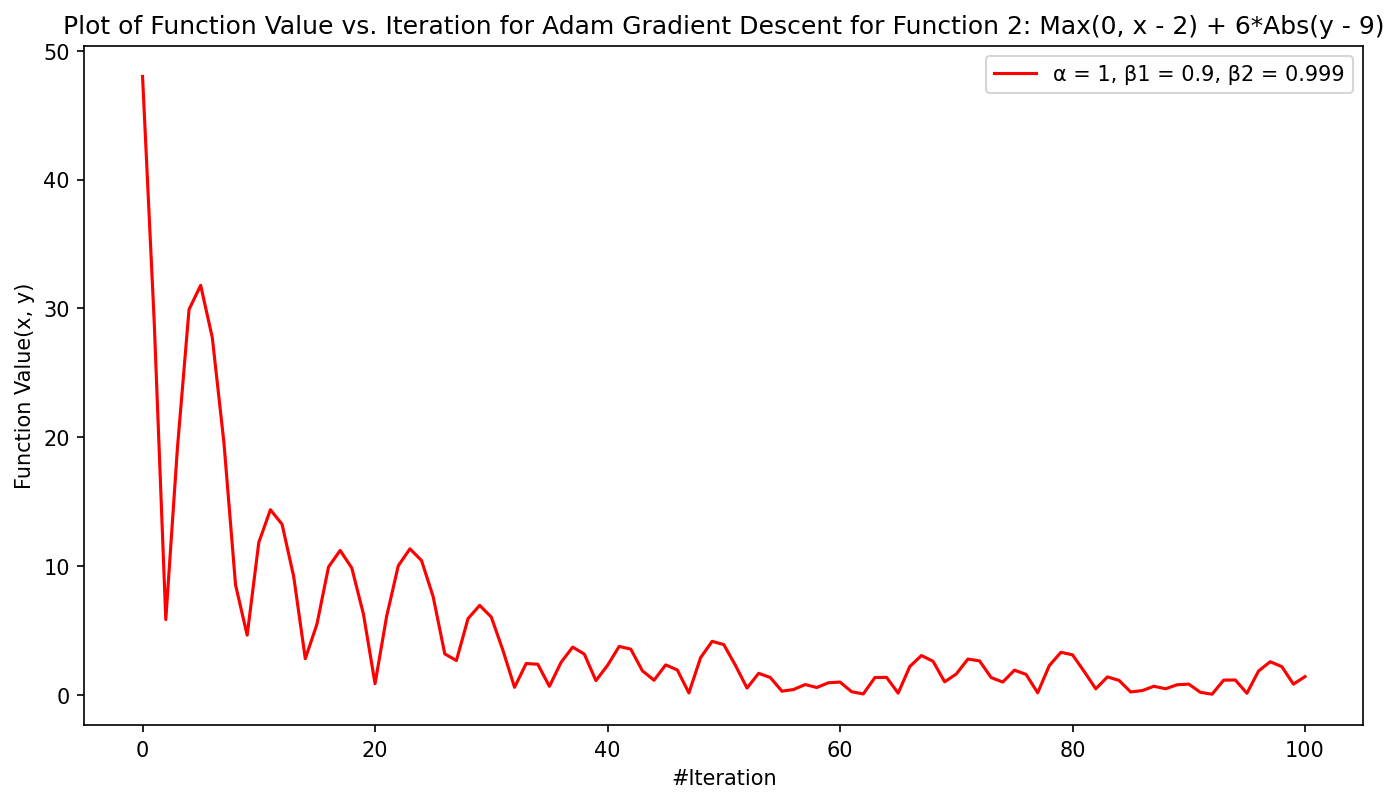

In [17]:
function2 = Function2()
x_values, y_values, function_values = execute_adam_gradient_descent(function2, starting_point_x = 1, starting_point_y = 1, alpha = 1, beta_1 = 0.9, beta_2 = 0.999, num_iterations = 100)
plot.figure(figsize=(11, 6), dpi=150)
plot.plot(function_values, color = "Red", label = 'α = 1, β1 = 0.9, β2 = 0.999' )
plot.xlabel('#Iteration')
plot.ylabel('Function Value(x, y)')
plot.title('Plot of Function Value vs. Iteration for Adam Gradient Descent for Function 2: Max(0, x - 2) + 6*Abs(y - 9)') 

plot.legend()
plot.show()